# Uživatelské funkce

V předchozích kapitolách jsme se již seznámili s mnoha funkcemi, zmínit lze například matematické funkce v modulu `math`, vestavěné funkce jako je `len` nebo funkce-konstruktory (vytvářejí nové objekty standardních tříd) jako  `list`, `int` nebo `float`. Speciálními případy funkcí jsou pak metody, které lze volat nad objekty některých tříd, například třídy string (`lower`, `startswith`, apod.) nebo `list` (`append, remove`, apod.)

Mezi funkce v zásadě patří i tzv. operátory (známe zatím aritmetické, relační, logické a některé speciální jako operátor `is` nebo `in`).

Co však mají všechny tyto různé reinkarnace funkce společné. Co dělá funkce funkcemi?

Nejlépe si funkce představíte jako magické objekty (jakési malé a silně specializované počítače), které získávají na vstupu různé objekty/hodnoty (čísla, řetězce, seznamy) a vrací jako výsledek nové objekty/hodnoty. Tento mentální model ilustruje (na příkladě vestavěné funkce `round`) následující obrázek.

![Model funkce](function.png)

Na obrázku si můžete všimnout i dvou základních rysů funkcí (nejen) v Pythonu:

1. funkce nemá stejně jako jakýkoliv objekt v Pythonu vlastní (interní) jméno. Typicky je však stejně jako ostatní déletrvající objekty opatřena proměnnou (jako štítkem). Existují však i anonymní funkce či funkce opatřené více štítky (více proměnnými)

2. funkce je v podstatě černá skříňka, tj. nemusí nás zajímat, jak způsobem nalezne ten správný výstupní objekt (to mimo jiné znamená, že mnohdy musíte funkcím důvěřovat)

Bohužel s tímto jednoduchým modelem funkcí si v Pythonu nevystačíte. Funkce v Pythonu totiž mohou měnit i své parametry (vstupní objekty). Výstupní hodnota často hraje v tomto případě jen vedlejší roli a proto mnohé z těchto funkcí vrací pouze hodnotu `None` (de facto tedy nevracejí nic). Příkladem (jak již bylo dříve zmíněno) jsou některé metody modifikovatelných objektů.

In [1]:
s = []
navratovaHodnota = s.append(0)
print(navratovaHodnota) # funkce metoda nic nevrací (= vrací None)
print(s) # změnil se však parametr funkce (adresát metody odkazovaný proměnnou)

None
[0]


Funkce nevracející hodnotu se v některých jazycích označují jako procedury. Často se používá i termín rutina resp. podprogram, který nejčastěji zahrnuje jak (vlastní) funkce tak procedury.

Ve skutečnosti je však terminologie v této oblasti dosti rozkolísaná, neboť programovací jazyky používají z historických důvodů svou vlastní terminologii. V Pythonu se pro veškeré podprogramy (vlastní funkce i procedury) používá termín *funkce*. Proto tak budeme činit i my.

Funkce mají v programovacích jazycích dvě základní role:

1. rozdělují program na menší snadněji spravovatelné části (s vlastní proměnnými)

2. umožňují stejný kód volat vícenásobně z různých míst programů (každé volání může být navíc parametrizováno, tj. vykonávat stejný kód nad různými daty)

Těchto možností však můžete plně využívat jen v případě, že kromě funkcí vestavěných a knihovních budete vytvářet i funkce vlastní.  To je naštěstí v Pythonu velmi snadné. Ukážeme si to na příkladu.

In [2]:
def zerolist(n):  # hlavička funkce
    return [0] * n  # tělo funkce

Tímto stručným zápisem jsme vytvořili novou funkci se jménem `zerolist`, která očekává jediný parametr. To vše prozrazuje *hlavička funkce* začínající klíčovým slovem `def` (zkratka za `define`). Následuje jméno funkce. Může to být v zásadě libovolný platný identifikátor, který je v daném kontexu jednoznačný (tj. není použit pro jinou funkci nebo pro proměnou). Úzus navíc doporučuje využívat jen malá písmena resp. podržítka pro případné oddělení slov.

Za jménem funkce jsou závorky, které obsahují seznam identifikátorů proměnných, jež jsou využity pro předávání parametrů. Naši funkci lze volat s právě jedním parametrem, jehož hodnota bude v těle funkce odkazována proměnou *n*. Tato proměnná je tzv.lokální tj. existuje jen po dobu vykonávaní dané funkce (pak zaniká a nikdy nemůže být obnovena).

Po seznamu parametr následuje dvojtečka, takže je zřejmé, že musí následovat odsazený blok příkazů. Ten tvoří tzv. tělo funkce. Tělo funkce je vykonáno při každém volání funkce, přičemž každé volání pracuje nad novými proměnnými parametrů (které mohou obecně označovat jiné hodnoty). V našem příkladě je tělo tvořeno příkazem `return`. Tento příkaz ukončí volání funkce, která následně vrátí hodnotu, jež vznikne vyhodnocením výrazu následujícím za klíčovým slovem `return` (v našem případě je to seznam tvořený `n` nulami).
   
Nyní zkusíme funkci zavolat:

In [3]:
zerolist(10)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

V rámci tohoto volání vznikla lokální proměnná `n` odkazující hodnotu 10. Byla využita v těle funkce pro vytvoření nového seznamu (v příkazu `return`) a poté zanikla. Návratovou hodnotou je seznam deseti položek 0.

Funkci můžeme zavolat znovu (tentokrát s jinou hodnotou parametru):

In [4]:
zerolist(3)

[0, 0, 0]

I při tomto volání vznikla nová proměnná. I když měla stejný název jako v prvním volání, jednalo se o jinou proměnnou (existovala v jiný čas a pravděpodobně i na jiném místě operační paměti. I tato proměnná nakonec zanikla.

Napotřetí tentokrát s využitím volání pojmenovaného parametru (namísto pozičního volání):

In [5]:
zerolist(n=8)

[0, 0, 0, 0, 0, 0, 0, 0]

Už z tohoto jednoduchého příkladu jsou vidět hlavní výhody použití funkce. Vytváření nulových seznamů je jednodušší, a především se nám podařilo ukrýt detaily implementace (funkce jako černá skříňka). Uživatel nemusí přemýšlet jak se nám podařilo vytvořit požadovaný seznam. Navíc pokud se rozhodneme implementaci změnit (například použít seznamovou komprehenzi) navenek se nic nezmění (stále se bude používat stejné volání). Změna se tak projeví jen na jednom místě programu, což usnadní udržení konzistence (při opakovaném využití kopie stejného kódu hrozí nebezpečí, že při změně implementace zapomeneme některý výskyt opravit, nebo jej opravíme špatně).

Funkce může mít samozřejmě i více parametrů:

In [14]:
def between(x, a, b): # funkce testující zda x leží v intervalu [a, b]
    return a <= x <= b

In [12]:
between(2, 1, 8)

True

Rozsáhlejší může být i tělo funkce:

In [23]:
def numberOfWords(text):  # funkce vracející počet slov v řetězci
    words = text.split(" ")   # rozdělení řetezce podle oddělovače
    return len(words)

In [25]:
numberOfWords("Three Rings for the Elven-kings under the sky")

9

Tato funkce má (resp. by měla) zjišťovat počet slov v řetězci (ten je předán jako jediný parametr funkce a je dostupný v lokální proměnné `text`), Funkce využívá metodu `split`, kterou lze volat na řetězec obsahující části oddělené určitým znakem nebo víceznakovou skupinou tzv. oddělovačem. Metoda vrací seznam těchto částí.

In [26]:
"a,b,c,d".split(",")

['a', 'b', 'c', 'd']

In [27]:
"kniha::Pán prstenů::Tolkien".split("::")

['kniha', 'Pán prstenů', 'Tolkien']

#### Lokální proměnné

Všimněte si také proměnné `words`,do níž je pole podřetězců přiřazeno. Tato proměnná je stejně jako proměnné určené pro ukládání parametrů tzv. **lokální** tj. existuje jen po dobu provádění dané funkce. Navíc je viditelná jen z těla funkce (tj. není viditelná ani z globální úrovně ani z jiných funkcí.

V Pythonu jsou lokálními proměnnými všechny proměnné vzniklé v těle funkce (prvním přiřazením) a proměnné uchovávající parametry (kterým se ne zcela přesně říká *formální parametry*).

In [31]:
# lokální proměnné nelze používat mimo těla své funkce (tj. ani na globální úrovni)
words

NameError: name 'words' is not defined

V okamžiku kdy navrhnete funkci tak jste odpovědni za její správnost (což je klíčové v okamžiku, kdy jsi spolu s jejím modulem nabídnete ostatním). Naše funkce pro počítání slov však má k dokonalosti daleko. Zkuste najít texty pro něž vrací chybný počet slov.

In [33]:
text = input()  # text je globální proměnná, která nemá nic společného se stejnojmenným lokálním parametrem
print(numberOfWords(text))

jednoslovo 
2


Pokud jste na žádný problém nenarazili, pak zkoušíte příliš jednoduché kombinace mezer (tj. oddělovačů). Problémem jsou mezery na začátku, mezery na konci a vícenásobné mezery.  Řešení je myslím zřejmé a již jsme se jím zabývali — před rozdělení zjednodošíte mezery pomoci metody `string.` a funkce `re.sub`.

> **Úkol**: Vytvořte robustnější verzi funkce pro počítání počtu slov.

In [36]:
import re

def numberOfWords(text):  # funkce vracející počet slov v řetězci
    text = text.strip()   # odstranění mezer na začátku a konci
    text = re.sub(" +", " ", text)  # zjednodušení vícenásobných mezer
    words = text.split(" ")   # rozdělení řetezce podle oddělovače
    return len(words)

numberOfWords("   x    y        z   ")

3

**Řešený příklad**:
    
I když Python a jeho knihovny nabízejí přehršel funkcí a metod (a o několik řádů menší počet operátorů), stále některé užitečné chybí. Jako příklad si uveďme generování náhodných řetězců. Zatímco Python v případě čísel Python podporuje desítky různých funkcí pro náhodné generování, u řetězců je situace tristní. Nic nám však nebrání vytvořit si funkci vlastní. Nejjednodušší možností jsou řetězce tvořené zcela nahodilým seskupením písmen jako např. "týívepvepfwá" nebo "jgýfěšýfěcpgp". Ty se však jen obtížně vyslovují a pravděpodobnost, že tvoří rozumné slovo či sousloví je pro delší řetězce de facto nulová (https://en.wikipedia.org/wiki/Infinite_monkey_theorem).

Generování všech foneticky či gramaticky realizovatelných posloupností znaků je na druhé straně příliš složitý úkol. Zvolíme tudíž střední cestu. Za prvé budeme generovat rozumné slabiky tvaru CV, CCV nebo CVC (kde C je souhláska a V samohláska). Navíc použijeme jen ty nejčastější spojeni tohoto druhu (vybrány ze seznamu tzv. bigramů resp. trigramů).
Z nich pak budeme vytvářet náhodná slova.

Podívejme se na generování náhodných slabik:

In [119]:
from random import choice

def randomSyllable():  # funkce nemá žádný parametr
    bigramy = ["ní","po","ro","na","je","te","le","ko","ne","ra",
           "to","no","la","li","ho","do","se","ta","ce","va",
           "ře","ti","lo","ně"]

    trigramy = ["pro","sta","pře","ter","pod","pra","sti","řed",
            "kon","nos","při","sou","při","tel","pol",
            "spo","jak","val","sto","tak","lov"]
    slabiky = list(bigramy)  # vytvoříme nový seznam a naplníme jej slabikami z pole bigramy
    slabiky.extend(bigramy)  # které přidáme ještě jednou
    slabiky.extend(trigramy) # a nakonec (jednou) slabiky ze seznamu trigramy
    return choice(slabiky) # a náhodně vybereme jednu slabiku ze seznamu

print(randomSyllable())

ně


Funkce pro generování je relativně přímočará. Nejdříve vytvoříme seznam bigramů (slabik o dvou písmenech) a trigramů (o třech písmenech). Pak vytvoříme spojený seznam, který obsahuje položky z obou seznamů, přičemž bigramy přidáme dvakrát (tím dvakrát zvýšíme pravděpodobnost jejich výběru, v češtině jsou slabiky typu CV tzv. otevřené častější).

Výběr je pak již snadný neboť v modulu `random` je funkce `choice`, která provádí náhodný výběr ze seznamu.

> *Poznámka*: Navržená funkce je sice funkční, ale není příliš efektivní, neboť všechny tři seznamy (bigramy, trigramy, slabiky) vznikají při každém volání funkce `randomSyllable`, což je zbytečné, neboť jsou stále stejné a neměnné (stačilo by je vytvořit jen jednou a pak je využívat). Řešení tohoto problému však vyžaduje znát základy tvorby OOP tříd (na což si musíte ještě trochu počkat).

Druhým krokem je funkce pro vytváření slov, jejímž parametrem je délka slova ve slabikách.

In [139]:
from random import randint

def randomWord(length=3):
    return "".join([randomSyllable() for i in range(length)])

print(randomWord(2))
print(randomWord())

koto
nevace


#### Implicitní hodnota parametru
Definice funkce obsahuje konstrukci, kterou zatím neznáme tzv. implicitní hodnotu parametru (v našem případě má parametr `length` implicitní hodnotu 3). Díky použití implicitní hodnoty lze funkci volat buď s jedním parametrem (proměnná `length` má pak hodnotu tohoto parametru) nebo bez parametru (proměnná `length`má pak implicitní hodnotu 3).

Pro implicitní hodnoty platí následující omezení:

* má-li parametr implicitní hodnotu, pak ji musí mít i všechny následující (jinak by nebylo poziční přiřazení parametrů jednoznačné)
* implicitní hodnoty nesmí využívat hodnoty jiných parametrů (jen konstanty, globální proměnné, apod.)
* implicitní hodnoty by měly být neměnnými (tj. čísla a řetězce jsou OK, seznamy nikoliv)

Poslední dvě omezení jsou důsledkem skutečnosti, že k vyhodnocení implicitních hodnot dochází jen jednou v místě definice funkce, nikoliv při každém jejím vyvolání. V tomto okamžiku nejsou dostupné žádné další parametry (funkce ještě nebyla volána) a vzniklý objekt je sdílen všemi voláními (což může u měnitelných objektů vést k podivnému a neočekávanémi chování). 

Uvnitř těla funkce je použita metoda `string.join`, která spojuje seznam řetězců do jediného velkého řetězce. Navíc vkládá mezi spojované řetězce oddělovač (což je fixní znak nebo skupina znaků). Metoda `join` je tedy opakem metody `split` (ta naopak podle oddělovače řetězec rozděluje). Adresátem metody je řetězec oddělovače (zde je to prázdný řetězec takže řetězce budou spojeny bez oddělovače). Parametrem je seznam náhodných slabik (seznam je vytvořen komprehenzí pomocí `length` volání naší funkce `randomSyllable`).

> **Úkol**: Vytvořte funkci generující náhodné věty (posloupnost náhodných slov oddělených mezerou). Slova mají náhodnou slabičnou délku s Poissonovým rozdělením s parametrem $\lambda = 2$ posunutý o 1 (https://en.wikipedia.org/wiki/Poisson_distribution). Počet slov ve větě je dán parametrem (implicitně 5).

> Rada: Náhodné číslo s požadovaným rozdělením získáte voláním funkce poisson z modulu `numpy.random` a přičtením jedničky.

In [157]:
from numpy.random import poisson

poisson(2) + 1

3

In [165]:
def randomSentence(words=5):
    return " ".join([randomWord(poisson(2) + 1) for i in range(words)])

randomSentence()

'vanos tak popotatana jaktak raro'

### Funkce s vedlejším efektem

Jak již bylo zmíněno v Pythonu se jako funkce označují i procedury, které nic nevrací (= vrací formálně `None`), namísto toho mění objekty předané jako parametry.

Parametrem musí být v tomto případě měnitelný objekt, tj. nikoliv čísla nebo řetězce. Prozatím známe jen jednu třídu (typ) měnitelných objektů — seznamy.


**Řešený příklad**:

Jako první příklad uveďme funkci, která se seznamu čísel odstraní všechny záporné a nulové hodnoty (jinak řečeno nechá jen kladné).

Elemenární algoritmus je zřejmý. Procházíme jednotlivé prvky, a pokud nalezneme záporné číslo resp. nulu tak jej se seznamu smažeme. Vlastní provedení však naráží na nečekané obtíže.

Za prvé nemůžeme využít cyklus `for` pro přímé procházení prvků, neboť během procházení seznamu tímto způsobem nelze seznam žádným způsobem modifikovat (v opačném případě by totiž nebylo možno jednoduše určit, co vlastně znamená projít všechny prvky jeden za druhým).

Pro procházení je tak nutno využít indexaci (tj. cyklus přes všechny indexy). Ani tak však nemáme vyhráno, neboť pokud bychom zvyšovali index od nuly po `len()-1` skončíme s výjimkou `IndexError`

In [169]:
def onlyPositive(vector): # (chybná) definice metody
    for i in range(len(vector)): # projdeme všechny indexy
        if vector[i] <= 0:       # je-li položka na indexu `i` záporná nebo nulová
            del vector[i]        # pak ji smažeme

p = [0, 1, 2, -2, -3, 4, 0] # testovací seznam
onlyPositive(p)  
print(p)

IndexError: list index out of range

Vše se jeví v pořádku, neboť iterujeme přes správný rozsah od 0 do `len(vector)` vyjma (tj. do `len(vector)-1` včetně). Nesmíme však zapomínat, že smazáním prvku se délka seznamu zmenší o jedničku. Tj. i když má ukázkový seznam na začátku 7 prvků, po smazání posledního (zde nuly na konci) má velikost 3. Funkce `range` se však vyhodnocuje jen jednou na začátku cyklu (včetně zjištění délky seznamu pomocí funkce `len`). Cyklus tak přistupuje i k prvkům, které už v seznamu nejsou.

Jedním z možných řešení je obrátit směr procházení, neboť v tomto případě se změna indexů týká jen té části seznamu, který již byl projit. 
pnoyt 
Pro iteraci přes čísla v opačném směru lze využít vetavěnou funkci `reversed`. Tato funkce očekává jako parametr libovolný objekt poskytující posloupnost objektů tzv. iterátor (rozsah `range`, seznam, apod.) a vrací objekt, který vrací tuto posloupnost v opačném směru.

In [170]:
for i in reversed(range(5)):
    print(i)

4
3
2
1
0


Řešení pomocí procházení seznamu v opačném směru je již  funkční:

In [172]:
def onlyPositive(vector): # (chybná) definice metody
    for i in reversed(range(len(vector))): # projdeme všechny indexy (od nejvyššího k nulovému)
        if vector[i] <= 0:       # je-li položka na indexu `i` záporná nebo nulová
            del vector[i]        # pak ji smažeme

p = [0, 1, 2, -2, -3, 4, 0] # testovací seznam
onlyPositive(p)  
print(p)

[1, 2, 4]


Ve skutečnosti není to řešení příliš efektivní, neboť každý výmaz vyžaduje přesunutí všech následujích prvků. Proto je ve většině případů efektivnější namísto mazání vytvořit nový seznam jen s požadovanými prvky. Navíc je jednodušší i zápis neboť lze využít seznamovou komprehenzi.

In [173]:
p = [0, 1, 2, -2, -3, 4, 0]

[x for x in p if x > 0]

[1, 2, 4]

**Řešený příklad**:

Užitečnou operací (kterou navíc není ve standardní knihovně) je rotace řetězců. Při rotace (doleva) se všechny položky  seznamu posunou o jednu pozici vpravo (tj. na index o jedničku menší). První položka se pak přesune na konec. Rotace lze navíc provádět i o více pozic najednou (roatce o dvě pozice je ve skutečnosti shodná s dvěma rotacemi o jednu pozici).

Zákaldní implementace je snadná:

In [175]:
def rotate(lst, shift=1):  # shift = o kolik pozic se seznam posune
    for i in range(shift): # opakuj (implementace rotací o více pozic)
        item = lst.pop(0)  # vyjmeme první položku a uložíme ji do lokální proměnné
        lst.append(item)   # a pak ji vložíme na konec
    return lst             # vrátíme odkaz na původní seznam (avšak posunutý)

testList = [1, 2, 3, 4, 5]
print(rotate(testList))  # rotace o 1 vlevo 
print(rotate(testList, 2)) # rotace o 2 vlevo (rotace se sčítají, takže seznam bude nakonec )

[2, 3, 4, 5, 1]
[4, 5, 1, 2, 3]


Funkce mění svůj první parametr (seznam) avšak zároveň vrací seznam jako návratovou hodnotu (tj. je to skutečná funkce). Nevrací však nový seznam ale originální seznam (resp. přesněji odkaz na něj). Tento styl může zjednodušit další zpracování seznamu, neboť tak lze jednoduše řetězit volání (i v našem případě můžeme modifikovaný seznam zobrazit voláním funkce `print` na výsledek volání funkce `rotate`). 

Na druhou stranu může být tento přístup matoucí, neboť uživatel funkce může snadno nabýt dojmu, že funkce vytváří nový seznam (který pak vrací). Proto se tento přístup v Pythonu příliš neužívá. Stačí se podívat na modifikující metody seznamu:

In [176]:
p = []
print(p.append(0)) # nic nevrací (vypíše se None)

None


Výše uvedená implementace rotace má hned několik nedostatků. Hlavním nedostatkem je značně neefektivní implementace rotace pro velké hodnoty `shift` (kdy se provede několik úplných rotací seznamu)

In [178]:
testList = [1, 2, 3]
print(rotate(testList, 334)) # provede se 111 úplných rotací + rotace o jedno číslo vlevo

[2, 3, 1]


Někteří uživatelé by navíc ocenili, kdyby bylo lze zadat záporný posun pro rotaci opačným směrem (doprava). Jak se při záporném posunu bud chovat naše funkce:

In [179]:
testList = [1, 2, 3]
print(rotate(testList, -1))  # cyklus se neprovede ani jednou (nedojde k žádnému posunu)

[1, 2, 3]


> **Úkol**: Upravte funkci pro rotaci tak, aby efektivně fungovala i pro velké posuny a záporné posuny (záporný posun znamená rotaci opačným směrem tj. doprava).

> Rada: Řešení vychází z úpravy hodnoty předané v parametru `shift`, tak aby ležel v rozsahu $[0, n-1]$, kde $n$ je délka seznamu (posunutí 0 je speciálním případem, k žádnému posunu nedojde). Platí například, že `-8 % 5 = 2`

In [193]:
def rotate(lst, shift=1):  # shift = o kolik pozic se seznam posune
    shift %= len(lst)
    if shift == 0:
        return lst # vracíme nezměněný originální seznam
    lst.extend(lst[:shift]) # přidáme na konec kopii prvků s indexem 0 až shift-1 (včetně)
    del lst[:shift] # a originální prvky smažeme (mažeme `shift` prvků)
    return lst

testList = [1, 2, 3, 4, 5]
print(rotate(testList))  # rotace o 1 vlevo 
print(rotate(testList, 22)) # rotace o 22 vlevo = 2 vlevo 
print(rotate(testList, -1)) # posun o 1 vpravo
print(rotate(testList, -202)) # posun o 202 vpravo = 2 vpravo
# nyní máme původní seznam
# zkontrolujeme i triviální případ (rotace o 0 pozic)
print(rotate(testList, 0))

[2, 3, 4, 5, 1]
[4, 5, 1, 2, 3]
[3, 4, 5, 1, 2]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


Vytváření vlastních funkcí si ukážeme ještě na jednom trochu rozsáhlejším příkladu (v němž se navíc ještě naučíme pár nových pythonských grifů).

**Řešený příklad**:

Jedním z oblíbených příčin konce světa u apokalyptiků je situace, kdy jsou všechny planety sluneční soustavy na jedné polopřímce (s počátkem na Slunci). To by podle předpovědí mělo vést k různým negativním jevům jako je změna rotační osy  Země, smrtící výtrysk hmoty ze Slunce apod (je zbytečné jít příliš do detailů, neboť toto není opora pro psychiatry). 

Naším úkolem bude vytvořit program, který zjistí, nejbližší termín potenciálního konce světa způsobený tímto fenoménem.  Nějdříve si však musíme zpřesnit zadání, neboť k absolutnímu zarovnání nemůže prakticky dojít (resp. k němu nedojde v tézo geologické epoše). Je tak nutno stanovit nějaký nenulový limitní úhel, určující výseč do něhož se planety musí vejít. Apokalyptici běžně pracují s úhly 10 a mnohdy i 30 stupňů (což by asi jen málokdo označil za dokonalou přímku). 

Navíc vnější planety Uran a Neptun se pohybují tak pomalu, že k jejich zarovnání dochází jen velmi zřídka.
Synodickou periodu Uranu a Neptunu, což je (mimo jiné) perioda mezi dvěma konjunkcemi obou planet (konjunkce je zjednodušeně okamžik nejtěsnějšího přiblížení dvou planet na obloze) lze vypočítat z jejich orbitálních (siderických) period (= čas za jakou dobu oběhnou Slunce) podle vztahu ($P_1$ a $P_2$ jsou oběžné periody jednotlivých těles zde tedy Urana a Neptunu):

${\displaystyle {\frac {1}{P_{\mathrm {syn} }}}={\frac {1}{P_{1}}}-{\frac {1}{P_{2}}}}$

In [198]:
def synodic_period(orbital_period_1, orbital_period_2):
    return abs(1/(1/orbital_period_1 - 1/orbital_period_2))  # abs je přidáno, aby nezáleželo na pořadí vstupů

synodic_period(165, 84) # orbitální periody Neptunu a Uranu

171.11111111111114

K zarovnání planet na přímce může docházet jen v relativně krátkém období v synodické periodě Uranu a Neptunu (když jsou obě planety blízko sebe) prokládané mnohem delšími obdobími, kdy těsná přiblížení nehrozí. Z tohoto důvodu umožníme některé planety z výpočtů vyloučit (typicky vnější). Tím můžeme zkrátit čekaní na apokalypsu na rozumný časový interval (apokalypsou za 150 let nikoho nevystrašíte :).

Nyní můžeme přejít k výpočtu, jehož jádrem je určení úhlové vzdálenosti mezi dvěma planetami. Tu lze zjistit z rozdílu tzv. ekliptikálních délek planet (pro jednoduchost předpokládáme, že se planety pohybují v jediné rovině). Ekliptikální délka je obdobou zeměpisné délky. Je to úhel průvodiče planety v polárních souřadnicích s centrem ve Slunci a  základní polopřímkou ve směru jarního bodu.

![ekliptikální délka](eclong.png)

Obrázek ukazuje Slunce (ve středu) a dvě planety. Hlavní osa (od níž se počítá úhel ekliptikální délky) směřuje vpravo a je označena symbolem jarního bodu (♈). Ekliptikální délka první (červené) planety $\ell_1$ je znázorněna červenou výsečí (je to cca 50°), ekliptikální délka druhé (modré) planety je znázorněna modrou výsečí a je cca 280°. Úhová vzdálenost mezi planetami (označená jako $\delta$) je konvexní úhel sevřený průvodiči obou planet. Absolutní hodnota rozdílu $\ell_1-\ell_2$ je buď úhlová vzdálenost (konvexní úhel) nebo jeho doplňový (konkávní úhel). V našem případě je rozdíl 230°(konkavní úhel) tj. úhlová vzdálenost je 360 - 230 = 130°.

Pro návrh funkce pro výpočet úhlové vzdálenosti dvou planet pomocí modulu `ephem` musíme získat heliocentrickou ekliptikální délku objektu representujícího planetu. K tomu slouží atribut hlong (*heliocentric longitude*). Výsledný úhel je speciální objekt, který se při použití aritmetiky chová jako `float` číslo vyjadřující úhel v radiánech. Při výpisu (kdy se převádí na řetězec) je formátován jako úhel ve stupních, minutách a vteřinách.

In [208]:
import ephem
mars = ephem.Mars()
mars.compute(ephem.now())
print( float(mars.hlong) )  # převádí se na číslo `float` v jednotkách radián
print( mars.hlong )          # formátuje se jako lidmi čitelný řetězec

earth = ephem.Sun()         # Země = Slunce?
earth.compute(ephem.now())
print (earth.hlong)

5.3329644203186035
305:33:22.9
306:19:12.0


Výše uvedený testovací kód vytváří dva objekty planet. Zatímco první z nich (Mars) nepřináší nic zajímavého, je v případě Země využit konstruktor `ephem.Sun` (nikoliv `ephem.Earth`). Důvodem této podivnosti, je skutečnost, že modul je napsán primárně pro (téměř) geocentrického pozorovatele (pozorování ze Slunce je to dost nepohodlné). Ten samozřejmě Zemi na obloze nevidí, tj. nemá smysl uvažovat o poloze Země na obloze, jejím západu a východu. Konstruktor `ephem.Earth` tak v modulu vůbec není.


Objekt `ephem.Sun` popisuje Slunce z geocentrického pohledu (má polohu na obloze, zapadá a vychází, apod.). Jedinou výjimkou jsou heliocentrické ekliptikální souřadnice, které nemají u objektu Slunce smysl (byla by to poloha Slunce vzhledem k Slunci). Autor tak využil tyto atributy pro helicontrickou polohu Země: "For a Sun body, they give the Earth’s heliocentric longitude and latitude". Je to poněkud matoucí, ale je to v souladu s tradicí (pozorovatelská astronomie je stále ze své podstaty geoecentrická).

Nyní už můžeme napsat (a otestovat) funkci počítající uhlovou vzdálenost ($delta$):

In [211]:
import math

def angle_between(planet1, planet2):
    delta = abs(planet1.hlong - planet2.hlong)
    return delta if delta < math.pi else 2*math.pi - delta  # úprava na konvexní úhel

angle_between(mars, earth)  # vrací float číslo (úhel v radiánech)

0.013328075408935547

Ve výrazu, který je argumentem příkazu `return` je použita nová konstrukce: podmíněný výraz. Jedná se o obdobu příkazu `if` který však lze použít na místě výrazu (tj. vyhodnotí se na nějakou hodnotu/objekt).  Je tak méně obecnější než příkaz `if` (v něm lze provádět i jiné činnosti, než je získávání nějaké výsledné hodnoty), může však výrazně zkrátit některé běžně používané zápisy.

Základní syntaxe podmíněného výrazu je:

``<výraz-then> if <podmínka> else <výraz-else>``

Nejdříve se vyhodnotí podmínka, pokud je pravdivá, pak se vyhodnotí `výraz-then`, jehož hodnota se stane hodnotou vělého podmíněného výrazu. Pokud je podmínka nepravdivá vyhodnotí se `výŕaz-else`, jehož hodnota se stane hodnotou celého výrazu. V následujícím příkladě se výraz vyhodnotí na jeden z řetězů (kontext viz https://en.wikipedia.org/wiki/2_%2B_2_%3D_5 (2+2=5).

In [213]:
"Svet je (zatim) v poradku" if 2 + 2 == 4 else "Velký bratr Vás sleduje"

'Svet je (zatim) v poradku'

Nyní již můžeme navrhnout klíčovou funkci, která pro danou množinu planet a konkrétní čas ověří, zda se všechny poaždované planety vejdou do výseče zadané velikosti (typicky malé, aby bylo možno tvrdit, že planety jsou soustředěny na jediné polopřímce). 

Princip je jednoduchý: pro každou dvojici planet se zjistí jejich vzájemná úhlová vzdálenost (na to už máme funkci). Pokud je větší než limitní úhel (výseč), pak rovnou můžeme vrátit `False`. Pokud jsou všechny úhlové vzdálenosti menší pak (po ukončení cyklu) můžeme vrátit `True`.

In [227]:
def all_inline(planets, ephem_time, sector_angle): 
    """
        planets: seznam ephem objektů planet zahrnutých do výpočtu
        ephem_time: čas výpočtu (v ephem representaci)
        sector_angle: úhel výseče do níž se musí vějít všechny planety (ve stupních)
    """
    # nejdříve přepočteme limitní úhel 
    sector_angle = math.radians(sector_angle)
    # pak musíme všechny objekty planet aktualizovat (přepočítat) pro dané datum
    for planet in planets:
        planet.compute(ephem_time)
    # a nyní už budeme kontrolovat všechny možné dvojice
    for planet1 in planets: # vnější cyklus
        for planet2 in planets: # vnitřní cyklus
            if angle_between(planet1, planet2) > sector_angle: # tato dvojice se nevejde do výseče
                return False # už nemusíme dál hledat 
    # po ukončení cyklu je zřejmé, že planety se do výseče vejdou (i ty nejvzdálenější mají mezi sebou menší úhel)
    return True 
    
# připravíme si seznam planet (Zemi zastupuje Slunce, viz výšeb)
innerPlanets = [ephem.Mercury(), ephem.Venus(), ephem.Sun(), ephem.Mars()]

all_inline(innerPlanets, ephem.now(), 30)

False

Řetězec umístění v trojitých uvozovkách na začátku těla funkce slouží jako tzv. dokumentační řetězec. Není určen pro překladač Pythonu (ten je ignoruje), ale pro programátory využívající příslušný kód. Dokumentační řetězec využitý u funkce typicky obsahuje popisy parametrů, návratové hodnoty apod. Typicky se zobrazuje v různých nápovědách (zkuste v notebooku zadat `?all_inline`).

*Upozornění*: Řetězec je interpretován dokumentační, protože je umístěn přímo na začátku těla funkce (nikam se nepřiřazuje ani není použit jako parametr). Trojité uvozovky (resp. trojité apostrofy) lze použít u jakéhokoliv řetězce. Jediný rozdíl od běžného řetězcového literálu (v jednoduchých uvozovkách) je možnost využití normálního odřádkování uvnitř literálu (proto se tento zápis běžně označuje jako víceřádkový řetězcový literál). V běžném řetězci musí být odřádkování representováno escape sekvencí `\n` (což není právě přehledné). 

Klíčovou částí funkce je dvojice cyklů přes objekty planet, z nichž jeden je vnořen do druhého. Program nejdříve vstoupí do první iterace vnějšího cyklu, v němž proměnná `planet1` označuje Merkur. V rámci této iterace vnějšího cyklu se provedou všechny iterace vnitřního tj. `planet2` označuje postupně Merkur, Venuši, Zemi a Mars. Volání funkce `angle_between` tak kontroluje úhlovou vzdálenost dvojic Merkur–Merkur, Merkur–Venuše, Merkur–Země a Merkur–Mars. Tím je dokončena první iterace vnějšího cyklu. V druhé iteraci vnějšího cyklu `planet1` označuje Venuši. Nyní se tedy kontrolují vzdálenosti od Venuše ke všem planetám (Venuše–Merkur, Venuše–Venuše, Venuše–Země a Venuše–Mars). Ve třetí iteraci vnějšího cyklu se kontrolují vzdálenosti od Země (dvojice si doplníte již sami). V poslední iteraci vbějšího cyklu  první planetou Mars a v pozici druhé se unovu vystřídají všechny (poslední dvojicí je Mars–Mars).

Výsledkem použití vnořeného cyklu je tudíž iterace přes všechny dvojice planet včetně dvojic v nichž se dvakrát opakuje stejná planeta. To výsledek neovlivní neboť úhlová vzdálenost je v případě těchto homogenních dvojic vždy nulová. Mírně se tím snižuje efektivita (výpočet je zcela zbytečný). Zjednodušený algoritmus však přináší i mnohem výraznější neefektivitu, neboť každá vzdálenost mezi dvěma různými planetami je ve skutečnosti počítána dvakrát (stačí si uvědomit, že např. vzdálenost Merkur–Venuše je stejná jako Venuše–Merkur). Naštěstí zpomalení není dvojnásobné, neboť ve většině případů dojde k brzkému předčasnému ukončení.

Samotný výsledek není příliš zajímavý. S vysokou pravděpodobností je výsledkem `False` (planety jsou nejsou ve stejném sektoru z pohledu od Země). Navíc to rozhodně nestačí na ověření správnosti.

Správnost kódu můžeme ověřit až v cílovém skriptu, který se pokusí nalézt nejbližší těsné zarovnání planet (alespoň těch vnitřních, kde k zarovnání dochází relativně často).  

Kód tohoto skriptu je přímočarý. Stačí použít cyklus v němž budeme postupně procházet jednotlivé dny a ověřovat, zda nedošlo k požadovanému jevu (planety ve výseči). Jednodenní krok v zásadě stačí pro výseče o velikosti 20° a více, neboť i ta nejrychlejší z planet se v průběhu jednoho dne posune (vzhledem k Slunci) o maximálně jednotky stupňů (jaká je nejrychlejší?).

Pro posun v kalendáři využijeme interní (avšak veřejnou!) implementaci času v modulu `ephem`. Čas je representován jako počet dnů od poledne 31.12 1899 (denní čas je representován jako desetinná část, tj. číslo je třídy `float`).

In [221]:
now = ephem.now()
print(now)  # přetypování na str, lidský formát
print(float(now))  # přetypování na float, interní formát
print(ephem.Date(now + 1)) # přičtením jedničky získáme počet dnů representujících časový okamžik za 24 hodin
# výsledkem je `float` které musíme převézt zpět na datum (= objekt třídy `ephem.date`)

2018/7/29 16:11:47
43309.17484953704
2018/7/30 16:11:47


In [244]:
now = ephem.Date("2000/1/1") # začneme na začátku století

for day in range(36525): # pro všechny dny v celém století
    checkedTime = ephem.Date(now + day)  # polohu testujeme v čase: nyní + `day` dnů
    if all_inline(innerPlanets, checkedTime, 18): # pokud jsou všechny ve výseči 18°
        print(checkedTime)

2037/12/6 00:00:00
2037/12/7 00:00:00
2037/12/8 00:00:00
2037/12/9 00:00:00
2069/12/20 00:00:00
2069/12/21 00:00:00
2069/12/22 00:00:00
2069/12/23 00:00:00
2069/12/24 00:00:00
2076/4/21 00:00:00
2082/9/8 00:00:00
2082/9/9 00:00:00
2082/9/10 00:00:00


Pro kontrolu jsem si zobrazil polohy vnitřních planet ve středu nejbližšího nalezeného intervalu (prosinec 2037) [zdroj program Skychart, https://www.ap-i.net/skychart/en/start].

![Planety v jedné přímce, prosinec 2037](planetline.png)

> **Úkol**: Upravte program tak, aby vypisoval úhel nejmenší výseče, v níž se nacházejí vnitřní planety. 

Aktuální implementace funkce kontrolující, zda se planety vejdou do do nějaké výseče se zadaným limitním úhlem, kontroluje postupně úhel mezi všemi dvojicemi planet a pokud je větší než limit, pak ihned vracíme `False`. Při volbě (relativně) malého úhlu stačí zkontrolovat jen několik málo dvojic, abychom mohli popřít zarovnání do výseče.

Podobný přístup můžeme zvolit pro hledání maximálního úhlu mezi dvěma planetami. I zde stačí zjist úhel mezi všemi dvojicemi planet a vrátit maximum. V tomto případě však musíme projít všechny (heterogenní) dvojice. To je však evidentně zbytečné.

Stačí se zamyslet jak bychom například zjistili maximální výškový rozdíl mezi lidmi v nějaké (větší skupině např. o 1000 lidech). Jednou z možností je zjistit rozdíl mezi všemi dvojicemi a pak nalézt maximum. To však vyžaduje řádově 1000 × 1000 odečítání a porovnání tj. řádově několik milionů operací. Všimněte si, že počet operací roste s počtem osob ve skupině kvadraticky (tj. počet operací je $2\times n^2$, kde $n$ je počet osob)

Existuje však přirozeně i kratší algoritmus: stačí najít člověka s maximální a minimální výškou a tyty údaje odečíst. To vyžaduje jen 2000 porovnání a jedno odečtení (stačí postupně procházet jednotlivé lidi a udržovat průběžné minimum a maximum). Počet operací roste v tomto případě lineárně (počet operací je $n$).

I když je obecná výhoda tohoto algoritmu zřejmá, je v našem konkrétním případě poněkud relativizována, neboť

1. porovnání se týká jen čtyř (maximálně 8) objektů (planet) a tak rozdíl mezi $n$ a $n^2$ není propastný
2. nalezení maximálního rozdílu není v případě úhlů tak triviální, neboť v potaz musíme vzít cyklický charakter úhlů.

Druhý problém si ukažme na příkladě. Mějme tři planety s ekliptikální délkou 10°, 20° a 350°. Jak velká je minimální výseč, která je obsahuje? Není to samozřejmě 340° (rozdíl maxima a minima), ale pouze 30° (20 + 360 - 350). Problematické jsou ekliptikální délky umístěné kolem 0° = 360 (resp. 0 = $2\pi$ v radiánech). 

Úhly (včetně ekliptikální délky) lze alternativně vyjadřovat v intervalu -180 až 180 ($-\pi$ až $\pi$). V tomto případě jsou naopak problematické úhly kolem 180° = -180°. 

Existence dvou alternativních vyjádření úhlů nicméně nabízí určité řešení. To však již nechám na Vás.

In [2]:
def minmax_diff(s): # vrací rozdíl minima a maxima v seznamu C
    min = s[0]
    max = s[0]  # na začátku je průběžné minimum a maximum rovno prvnímu prvku
    for i in range(1, len(s)):
        if s[i] < min:  # to již známe
            min = s[i]
        if s[i] > max:
            max = s[i]
    return max - min

test = [-2, 3, 7, 8, 1, -3, 9, 0] # pro jistotu zkontrolujeme
minmax_diff(test)

12

In [31]:
import math
import ephem

# tentokrát to zkusíme pro všechny odedávna známé planety
ancientPlanets = [ephem.Mercury(), ephem.Venus(), ephem.Sun(), ephem.Mars(), ephem.Jupiter(), ephem.Saturn()]

def minimal_sector(planets, ephem_time):
    for planet in planets:  # updatujeme objekty planet
        planet.compute(ephem_time)
    # získáme seznam úhlů ekliptikální délky v rozsahu 0 a až 2Pi
    elongs360 = [planet.hlong for planet in planets]
    # a pro jistotu seznam týchž úhlů v rozsahu -Pi až Pi
    elongs180 = [(angle - 2*math.pi if angle > math.pi else angle) 
                  for angle in elongs360]
    # vypočteme diferenci maxima a minima pro oba vyjádření úhlů
    # pokud budou planety soustředěny 
    return math.degrees(min(minmax_diff(elongs360), minmax_diff(elongs180)))

start = ephem.Date("2000/1/1") # začneme na začátku tisíciletí

for day in range(10*36525): # pro všechny dny v celém tisíciletí
    checkedTime = ephem.Date(start + day)  # polohu testujeme v čase: nyní + `day` dnů
    sector = minimal_sector(ancientPlanets, checkedTime)
    if sector < 30:
        print(checkedTime, sector)

2795/11/20 00:00:00 28.32004067638055
2795/11/21 00:00:00 26.105324517247237
2795/11/22 00:00:00 25.1905641118966
2795/11/23 00:00:00 24.27525729141236
2795/11/24 00:00:00 23.359390395416177
2795/11/25 00:00:00 24.54885417899556


## Rekurze

Jedním z mechanismů programování, které úzce souvisejí s funkcemi (obecně podprogramy) je rekurze.

Princip rekurze se používá i v matematice, tam je to však relativně okrajové téma.

Podívejme se například na jednu z možných definicí faktoriálu:

$n!=n\cdot (n-1)!$ 

$1! = 1$

Všimněte si, že v této definici je faktoriál čísla $n$ definován pomocí jiného faktoriálu (čísla $n-1$). Například faktoriál 3! je podle této definice roven $3\cdot 2!$. Pokud použijeme definici znovu získáme hodnotu $3\cdot 2\cdot 1!$, což po dosazení podle druhého vztahu vede na $3\cdot 2\cdot 1 = 6$.

Tento tzv. rekurzivní vztah vede k vnořené aplikaci rekurentního pravidla, které však skončí po konečném počtu kroků použitím tzv. koncového již nerekurentního pravidla.

Tuto definici lze velmi snadno realizovat i v Pythonu:

In [34]:
def factorial(n):
    return 1 if n== 1 else n*factorial(n-1) # pro procvičení podmíněný výraz

factorial(3)

6

Rekurzi snadno poznáte podle toho, že se v těle funkce volá tatáž funkce (s jinou hodnotou parametru), tj. funkce volá sebe samu.

Použití takto jednoduchých rekurzí v Pythonu však vede ve většině případů k značně neefektivnímu kódu.  Například  faktoriál lze mnohem efektivněji naprogramovat pomocí cyklu.

Někdy může vést použití rekurze k extrémně pomalému kódu. Klasický (proti)příklad je rekurzivná výpočet Fibonnaciho posloupnosti:

$F(n)=\left\{{\begin{matrix}1&&{\mbox{pro }}n\in{0,1};\ \ \,\\F(n-1)+F(n-2)&&{\mbox{jinak.}}\end{matrix}}\right.$

Jinak řečeno n-té Fibonnacciho číslo je součtem dvou předchozích členů posloupnosti, přičemž posloupnost začíná dvěmi jedničkami. Dalšími členy posloupnosti je 2, 3, 5, 8, 13, atd.  

I tuto rekurzivní definici lze přímo zapsat v Pythonu:

In [37]:
def slow_fibbo(n):
    if n <= 1:
        return 1
    else:
        return slow_fibbo(n-1) + slow_fibbo(n-2)

slow_fibbo(5)

8

Pro malá čísla je doba výpočtu okamžitá. Ale již pro malé desítky, je doba výpočtu neakceptovatelná (pro hodnoty kolem 50 můžete čekat na výsledek celý den.

In [47]:
%timeit slow_fibbo(38)

16.7 s ± 429 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Důvodem enormní pomalosti je skutečnost, že pro výpočet n-čísla je nutno volat dvakrát funkci `slow_fibbo` na první úrovni vnoření, poté čtyři volání na druhé (dvě volají dvě), na třetí osm (dvě volají dvě, z nichž každá pak volá dvě). I když některé větve relativně rychle skončí, je celkový počet volání roven číslu $k^2$, kde $k$ je koeficient ležící v intervalu $(1,2)$.

![Strom rekurze Fibonnaciho posloupnosti](fibo.png)

Počet operací tak roste ecponenciálně tj, již pro relativně malé hodnoty $n$ je doba výpočtu neexceptovatelná. Pro $n$ v řádu malých stovek by nemusela stačit ani geologický eon (řádově miliarda let, viz https://cs.wikipedia.org/wiki/Eon).

> **Úkol**: Odhadněte konstantu (základ) $k$ pro rekurzivní algoritmus výpočtu Fibonnaciho čísel. Odhadněte dobu trvání výpočtu pro $n$ = 120 (v rocích).

Stačí spočítat dobu trvání výpočtu pro vhodně zvolené $n$ a $n+1$. Podíl těchto časů je roven $\frac{k^{n+1}}{k^n} = k$. Zvolené $n$ by nemělo být příliš malé (doba výpočtu obsahuje i konstantní člen daný režií spuštění) ani velké (musíme se dočkat výsledku).

In [48]:
%timeit slow_fibbo(31)

544 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%timeit slow_fibbo(30)

337 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
544/337  # doba výpočtu na mém počítači v milisekundách

1.6142433234421365

Základ exponenciální funkce je řádově 1,61. Doba výpočtu v rocích pro $n=120$ tedy je:

In [60]:
ms = 337 * 1.61**90 # čas v milisekundách (čas pro n=30 vynásobený odhadovaným zpomalením)


ms / (1000.0 * 86400 * 365.35) # čas v rocích (86400 je počet sekund v rámci dne)

43927439530.23501

Nepříjemnou skutečností je, že existují i relativně elementární problémy, které nelze řešit jinak než v exponenciálním čase. Typickým příkladem je problém obchodního cestujícího (https://cs.wikipedia.org/wiki/Probl%C3%A9m_obchodn%C3%ADho_cestuj%C3%ADc%C3%ADho).

Fibonnacciho čísla však nejsou tento příklad. Je totiž zřejmé, že pokud začneme s počátečními hodnotami 1,1, pak výpočet každé následující hodnoty vyžaduje pouze jednu operaci sčítání: 1+1 = 2, 1+2 = 3, 2+3 = 5, 3+5 = 8, atd. Stačí tedy napsat cyklus který mění hodnoty dvou proměnných (pro výpočet stačí znát jen poslední dvě čísla).

In [63]:
def fibo(n):
    a = 1
    b = 1
    for i in range(n-1):  # končíme u n-2 včetně (první dvě čísla nemusíme počítat)
        a, b = b, a + b   # toto je jádro výpočtu, proměnná b je nové Fibonnaciho číslo (a je to předešlé)
    return b

fibo(5)

8

A výpočet 120 čísla nebude trvat geologické věky :)  Rozdíl je opravdu propastný u mne to trvá jen cca 5,3 mikrosekund.

In [66]:
%timeit fibo(120)

5.27 µs ± 7.19 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Nyní tedy již víme, kdy rekurzi nepoužít. Existují vůbec situace, v nichž je rekurze ekceluje? 

**Řešený příklad**:

Navrhněte funkci, která najde prvek v seřazeném (setříděném) seznamu a vrátí jeho index.

Nejdříve si připravme setříděný seznam větší velikosti:

In [2]:
import random

# nesetříděný seznam milionu náhodných celých čísel z rozsahu nula až miliarda
biglist = [random.randint(0,10**9) for _ in range(1_000_000)] 
# přidáme prvek, který budeme hledat (pravděpodobnost, že tam již je je téměř nulová)
wanted = 420_420_420
biglist.append(wanted)
# a pole setřídíme
biglist.sort()
# pro kontrolu zobrazíme prvních deset členů
print(biglist[:10])

[396, 3644, 5131, 6312, 6841, 7340, 9267, 9492, 10913, 11664]


In [71]:
# vyzkoušíme vestavěné řešení
print(biglist.index(wanted))

420134


Metoda `index` prohledává postupně všechny prvky, dokud nenarazí na hledaný, takže pro velké seznamy není příliš efektivní (čas hledání roste lineárně s počtem prvků, takže čas je i tak stále relativně rozumný) 

In [72]:
%timeit  biglist.index(wanted)

24.1 ms ± 213 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Můžeme však být ještě efektivnější. Stačí si vzpomenout jak lze hledáte konkrétní stránku v knize. Můžeme sice postupně odlistovat (stránku za stránkou), ale v encyklopedii o 1000 stránkách může takovéto hledání např. stránky 420 trvat pár minut.

Samozřejmě existuje snadnější cesta: pokud známe celkový počet stran, pak odhadneme v jaké části je hledaní stránka (v našem případě tak ve 2/5 encyklopedie) a přibližně v této části knihu otevřeme. Pokud máme to nehorázné štěstí a otevřeme na stránce 420 pak máme hotovo. Pravděpodobněji však knihu otevřeme na některé blízké např. na straně 400. Nyní můžeme algoritmus opakovat, tentokrát na té části knihy mezi otevřenou stránkou (kam si dáme záložku) a koncem knihy (hledaná stránka má vyšší číslo). Nyní odhadneme, že knihu otevřeme cca na 1/30 tj. cca 3% od záložky. I nyní se můžeme trefit, pokud však ne, pak budeme blízko např. na straně 430.  Nyní použijeme základní algoritmus potřetí tentokrát na tu část knihy mezi stránkami 400 (záložka) a 430 (aktuálně otevřená). Nyní je zřejmé, že otevření provedeme ve cca 2/3 těch 30 stránek. Nyní už je relativně velká šance, že se trefíte (pokud ne pak stačí jen pár dalších otevření).

Tento algoritmus můžeme použít i na náš seznam, i když čísla netvoří souvislou řadu. Musíme pouze počítat s tím, že hledané číslo nemusíme najít. V tomto případě stejně jako metoda `index` vrátíme -1.  Bohužel ošetření této možnosti trochu komplikuje program.

In [20]:
def fastindex(s, wanted, leftindex, rightindex):
    """
     s: prohledávaný řetězec
     wanted: hledaný prvek
     leftindex: index počáteční (od něj se hledá)
     rightindex: index (až po něj včetně se hledá)
    """
    # print(leftindex, rightindex) # jen pro účely ladění (zkuste odpoznámkovat)
    if rightindex < leftindex:  # klíčová koncová podmínka (v případě neexistence prvku)
        return -1
    left = s[leftindex] # položka na levém indexu (první = minimální)
    right = s[rightindex] # položka na pravém indexu (poslední = maximální)
    if wanted < left or wanted > right: # hledaná hodnota leží mimo rozsah
        return -1  # nemůže být tedy nalezena 
    interindex = leftindex + (rightindex-leftindex) * (wanted - left) // (right - left)
    if s[interindex] == wanted:  # prvek nalezen
        return interindex
    if s[interindex] < wanted:  # prvek je v pravém segmentu
        return fastindex(s, wanted, interindex, rightindex-1)
    else:                       # resp. v levém
        return fastindex(s, wanted, leftindex+1, interindex)

fastindex(biglist, wanted, 0, len(biglist)-1)

420397

Klíčovou částí těla funkce je výpočet odhadované pozice indexu, pomocí jednoduché lineární interpolace. Pokud známe hodnotu prvního prvku (s indexem `leftindex`) a hodnotu prvku posledního (index `rightindex`), pak při předpokladu rovnoměrného růstu prvků můžeme odhadnout pozici hledaného prvku jednoduchou interpolací (viz obrázek). 

![Hledání interpolací: krok 1](f-interpol1.png)


Interpolační úsečka spojuje body s pozicí (leftindex, left) a (rightindex, right). Pokud známe tuto úsečku není problém najít pro hledanou hodnotu `wanted` index, který jí podle interpolační úsečky přísluší. Tento index označíme jako `interindex`.

Všimněte si, že pokud je hledaný prvek roven prvnímu (levému) je výsledek interpolačního výrazu skutečně roven levému indexu (`leftindex + 0 / (right - left)`), stejně tak je roven pravému indexu při hodnotě (wanted == right).

Pokud `interdidex` indexuje hledaný prvek (`s[interindex] == wanted`) pak tento index vrátíme. Jinak se provede **rekurzívní** volání. V kterém však budou použit jiný levý a pravý index. Pokud je hledaná hodnota v levé části, pak bude vnořené volání hledat mezi indexy `leftindex+1` a `interindex` (včetně), v případě pravé části mezi indexy `intertindex` a `rightindex` (opět včetně). V našem případě lze toto vnořené hledání znázornit dalším obrázkem.

![Hledání interpolací: krok 2](f-interpol2.png)

Klíčovou roli má posunutí levého resp. pravého okraje na následující (`leftindex+1`) resp. předcházející položku (`rightindex-1`). Tím se prohledávání nejen o něco urychlí (je zbytečné opět kontrolovat krajní položku), ale především se zabrání vzniku nekonečné rekurze (tj.do potenciálně nekonečná vnořená volání, která v realitě vedou po krátké době k předčasnému ukončení programou výjimkou). I tento drobný posun totiž zajištuje, že nový interval je vždy menší než předchozí (a to i tehdy pokud `interindex` padne do některého z původních krajních). Protože v každém kroku zmenšujeme konečný interval indexů, je zřejmé, že volání musí někdy skončit (tj. je dosaženo stavu `rightindex < leftindex`).

Tato situace nastává i v našem případě, kde výpočet interindexu vede k hodnotě 5 (výsledek by měl být cca 5,6, ale díky použití celočísleného dělení se zaukrouhlí na 5). Interindex je tak roven původnímu levému indexu. Hodnota se ani v tomto kroku nenajde, a tak nové rekurzivní volání bude hledat v rozsahu 5 (`interindex`) až 6 (`rightindex` - 1). Na této úrovni už hledanou hodnotu najde (je na pozici `rightindex`).

A nyní ověříme, že se hledání urychlilo.

In [87]:
%timeit fastindex(biglist, wanted, 0, len(biglist)-1)

1.55 µs ± 4.24 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Zrychlení je úžasné, namísto původních cca 25 ms máme 1.5 µs, tj. zrychlení je v řádu desetitisíců. Důvod je   zřejmý: namísto miliónů porovnání se provedlo jen pár vnořených volání (v řádu $\log\log(n)$). Tj. i pro pole rozsahu biliónů položek by hledání trvalo jen pár milisekund (taková pole se však už bohužel nevejdou do operační paměti současných stolních a přenosných počítačů).

> **Úkol**: Interpolační hledání je pro vhodná data tím nejrychlejším exitujícím algoritmem. V praxi se však více implementuje tzv. binární vyhledávání (vyhledávání půlením intervalu). Nevyžaduje rovnoměrný nárůst prvků (stačí jen jsou-li seřazené) a má menší režii v každém rekurzivním volání.

> Tento algoritmus se od interpolačního liší jiným výpočtem mezilehlého indexu (`interindex` v našem programu). Vypočítá se jako (celočíselný) průměr levého a pravého indexu `(rightindex + leftindex)//2` (je tedy přibližně uprostřed)

> Vytvořte funkci pro binární vyhledávání (se stejnými parametry jako má funkce`fastindex`) a ověřte na našem testovacím velkoseznamu její efektivitu.

In [18]:
def binindex(s, wanted, leftindex, rightindex):
    """
     s: prohledávaný řetězec
     wanted: hledaný prvek
     leftindex: index počáteční (od něj se hledá)
     rightindex: index (až po něj včetně se hledá)
    """
    # print(leftindex, rightindex) # jen pro účely laděné (zkuste odpoznámkovat)
    if rightindex < leftindex:  # klíčová koncová podmínka (v případě neexistence prvku)
        return -1
    left = s[leftindex] # položka na levém indexu (první = minimální)
    right = s[rightindex] # položka na pravém indexu (poslední = maximální)
    interindex = (rightindex + leftindex) // 2
    if s[interindex] == wanted:  # prvek nalezen
        return interindex
    if s[interindex] < wanted:  # prvek je v pravém segmentu
        return binindex(s, wanted, interindex+1, rightindex)
    else:                       # resp. v levém
        return binindex(s, wanted, leftindex, interindex-1)

binindex(biglist, wanted, 0, len(biglist)-1)

420397

In [15]:
%timeit binindex(biglist, wanted, 0, len(biglist)-1)

7 µs ± 13.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Hledání je sice o něco pomalejší (cca 3×) ale řádově srovnatelné. Důvodem je o něco větší úroveň zanoření (20 oproti 5)

### Funkce jako parametr

Parametry funkcí nemusí být pouze čísla, řetězce, kolekce resp. jiné datové objekty. Parametrem funkcí mohou být i (jiné) funkce. Podobně je tomu i u návratových hodnot, tj. funkce může vracet jinou funkci.
Tato možnost otvírá zcela netušené možnosti, z nichž ty nejzajímavější jsou bohužel mimo zaměření této výukové opory. Některé jednodušší případy užití si však ukázat můžeme.

Nejdříve malý příklad:

In [48]:
def nest(function, x, n):
    for i in range(n):  # n-krát
        x = function(x)
    return x

Tato funkce zajišťuje vícenásobné vnořené volání předané unární funkce `function` na hodnotu `x` (počet volání určuje parametr `n`).  Jinak řečeno funkce vrací hodnotu `f(f(f....f(x)))`, kde počet vnořených volání funkce je roven `n`.

In [56]:
import math
nest(math.cos, 10, 100)

0.7390851332151607

#### Jednoduchá knihovna pro grafy — matplotlib

Praktičtější příklad využití funkce jako parametru si můžeme ukázat s využitím baláčku `matplotlib`, který slouží pro vizualizaci dat pomocí grafů. Tato knihovna je navíc dobře integrována do Jupyter notebooku.

Ukažme si jako příklad vykreslené grafu funkce sinus. Program má v zásadě čtyři části:
1. magický příkaz `%matplotlib` (začínající znakem %), který zajistí zobrazení interaktivního výstupu v notebooku. Parametrem je jméno ovladače (zde je použit `notebook` zajišťující interaktivní zobrazení, využít lze i `inline`).

2. příprava zobrazovaných dat. Matplotlib nezobrazuje funkce, ale datové body, které jsou zadány jako vektor x-ových a vektor y-souřadnic (kde vektor může být například representován seznamem). Vektor x-ových hodnot je typicky posloupnost hodnot od $x_{min}$ do $x_{max}$ s určitým krokem (doporučuji řádově malé stovky bodů). Vektor y-je v našem příkladě vytvořen aplikací funkce na každou hodnotu `x` pomocí seznamové komprehenze.

3. nastavení grafu (rozsahů, dekorací). V našem případě je zapnuta mřížka.

4. vykreslení grafu pomocí funkce `plot`

<IPython.core.display.Javascript object>


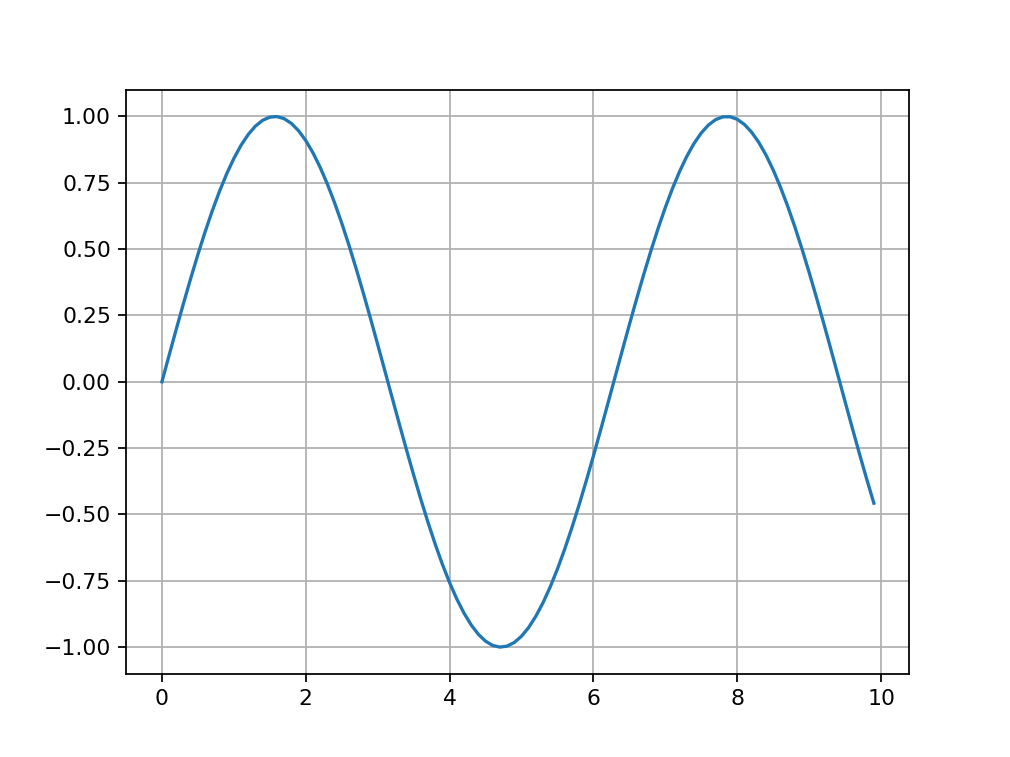

In [82]:
%matplotlib notebook

import matplotlib.pyplot as plt
xs = [0.1 * i for i in range(0,100)] # x-ové hodnoty (od nula do 10, s krokem 0.01)
ys = [sin(x) for x in xs] # y-ové hodnoty

plt.grid(True) # zapnutí mřížky
plt.plot(xs, ys) #  vytvoření grafu

Pokud chceme primárně vykreslovat funkce zadané předpisem (včetně funkcí elementárních) je rozhraní modulu `pyplot` poněkud nepřehledné (zobrazovaná funkce je ukryta uvnitř komprehenze). Vytvořeme se proto pomocnou funkci.

<IPython.core.display.Javascript object>


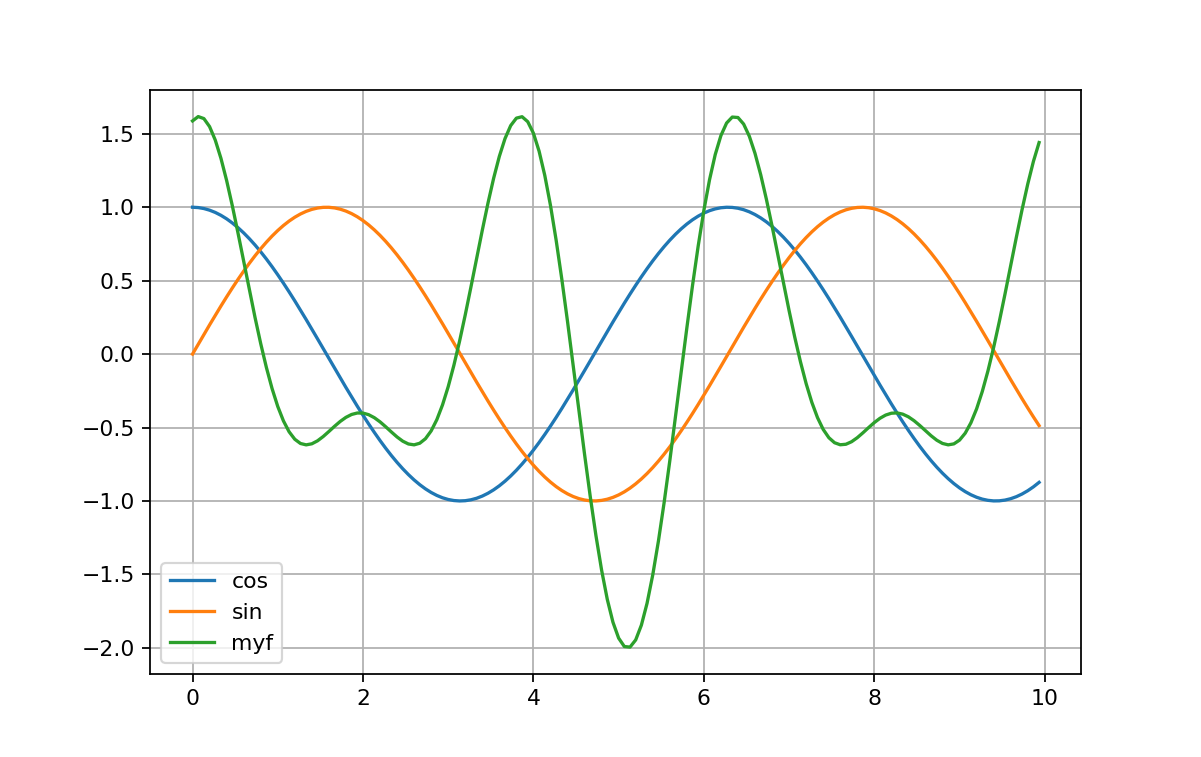

In [81]:
%matplotlib notebook

def fplot(f, xmin=0, xmax=10, points = 150):
    step = (xmax-xmin)/points
    xs = [step * i for i in range(points)] # x-ové hodnoty (od nula do 10, s krokem 0.01)
    ys = [f(x) for x in xs] # y-ové hodnoty (volání předané funkce na všechny x)

    plt.grid(True) # zapnutí mřížky
    plt.plot(xs, ys, label=f.__name__) #  vytvoření grafu

def myf(x):  # lze si samozřejmě připravit i vlastní funkci jedné reálné proměnné
    return 1.2*math.sin(2.0*x + math.pi/4) + 0.8*math.cos(3*x + math.pi/8)
    
fplot(math.cos)
fplot(math.sin)
fplot(myf)   # zobrazení vlastní funkce
plt.legend()

Tělo funkce `fplot` (=*function plot*) obsahuje v zásadě stejné příkazy jako základní ukázka. Kromě zobrazované funkce lze funkci předat i meze osy `x` a počet bodů, v nichž se počítá funkce (u všech těchto parametrů jsou uvedeny rozumné implicitní hodnoty).

Jedinou novinkou je uvádění popisek (*label*) funkcí ve volání `plot` (předány jsou jako pojmenovaný parametr). Jako popisek se použije jméno funkce, které lze získat pomocí atributu `__name__` jména funkce (dvě podtržítka na začátku a dvě na konci, atributy takto označené jsou poskytovány přímo na úrovni jazyka). Popisky funkcí jsou následně využity při tvorbě legendy (ta je přidána volání funkce `plt.legend`).

> **Úkol**: Popisky získané z interních jmen funkcí nejsou v některých případech příliš užitečné. Rozšiřte funkci `fplot` tak, aby je bylo možno zadat explicitně (interní jméno zůstane jako implicitní volba pokud popisek nezadáte).

> Rada: Implicitní hodnoty nemohou odkazovat jiné parametry (implicitně jsou vyhodnocovány v místě definici funkce, nikoliv při jejím volání).

<IPython.core.display.Javascript object>


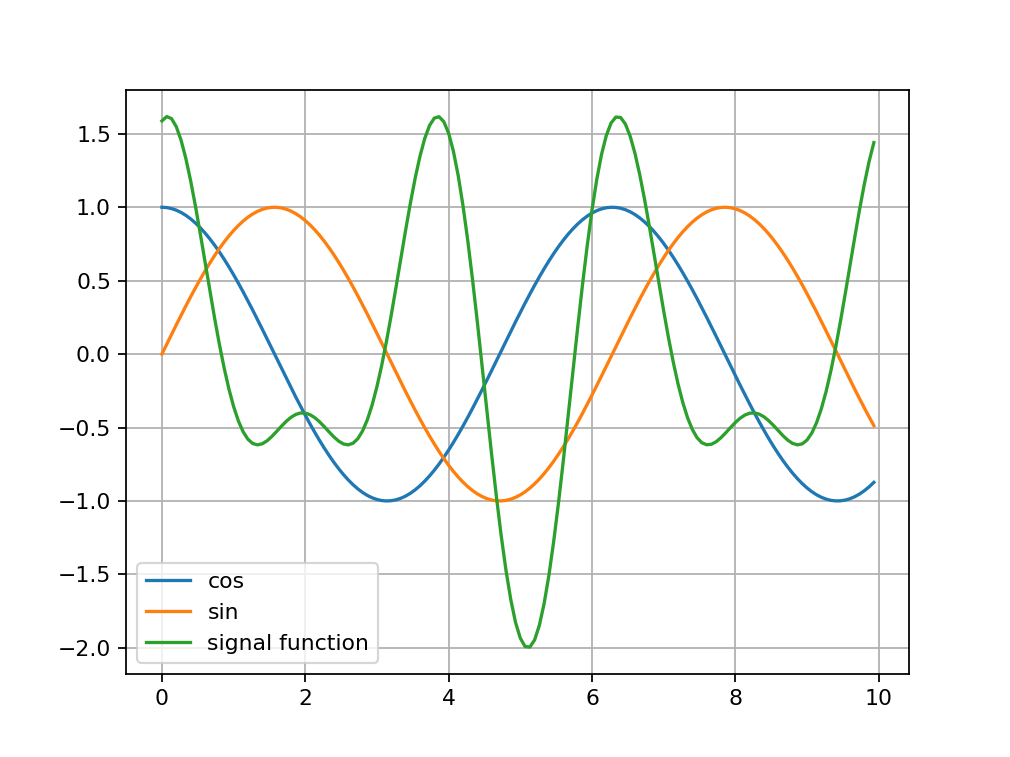

In [84]:
%matplotlib notebook

def fplot(f, xmin=0, xmax=10, points = 150, label=None):
    step = (xmax-xmin)/points
    xs = [step * i for i in range(points)] # x-ové hodnoty (od nula do 10, s krokem 0.01)
    ys = [f(x) for x in xs] # y-ové hodnoty (volání předané funkce na všechny x)

    plt.grid(True) # zapnutí mřížky
    if label is None: # 
        label = f.__name__
    plt.plot(xs, ys, label=label) #  vytvoření grafu

def myf(x):  # lze si samozřejmě připravit i vlastní funkci jedné reálné proměnné
    return 1.2*math.sin(2.0*x + math.pi/4) + 0.8*math.cos(3*x + math.pi/8)
    
fplot(math.cos)
fplot(math.sin)
fplot(myf, label="signal function")   # zobrazení vlastní funkce
plt.legend()

### Anonymní funkce

Při volání funkce není nutné, aby byly předávané objekty předem opatřeny proměnnou. Na místě parametrů lze přímo využívat konstanty nebo výrazy (nikoliv jen proměnné).

In [86]:
import math

math.log2(16)

4.0

V případě předávání funkcí je situace složitější, neboť zatím umíme vytvářet funkce jen prostřednictvím definice pojmenované funkce. 

Podívejme se například na metodu `list.sort`. Tato metoda, s níž jsme se seznámili již v předchozí části opory, řadí obsah seznamu vzestupně.

In [100]:
s = [-1, 3, 4, -6, 5, 4]
s.sort() # řadí se přímo pole `s` (nevytváří se nové)
print(s)

[-6, -1, 3, 4, 4, 5]


Pomocí pojmenovaného prametru `reverse` lze zařídit setřídění v opačném směru (tj. sestupně).

In [101]:
s = [-1, 3, 4, -6, 5, 4]
# nový seznam (původní je již setříděný i když vzestupně)
s.sort(reverse=True)
print(s)

[5, 4, 4, 3, -1, -6]


V praxi však máme na řazení větší požadavky. Čísla můžeme chtít setřídit na základě jejich absolutní hodnoty. 

V tomto případě se nám hodí další pojmenovaný parametr metody `sort` s názvem `key`. Tento parametr očekává funkci, která určuje podle čeho se bude řadit. Zatímco v běžném případě vychází z uspořádání mezi prvky seznamu (tj. se například testuje zda $s_i < s_j$) při použití parametru `key` se vychází z uspořádání hodnot získaných voláním klíčové funkce na  prvky tj. testuje se například $key(s_i) < key(s_j)$. Použití klíčové funkce přitom nikterak nemění hodnoty v uspořádaném poli (ty jsou stejné jako v původním poli jen v jiném pořadí).

Pokud tedy chceme čísla upořádat podle absolutních hodnot, stačí zadat funkci `abs` na místě klíčové funkce. 

In [102]:
s = [-1, 3, 4, -6, 5, 4]
s.sort(key=abs) # řadí se podle aboslutní hodnoty prvků
print(s)

[-1, 3, 4, 4, 5, -6]


Problém nastane, pokud je klíčová funkce složitější. Zkusme například seznam seřadit tak, že nejdřívě budou lichá čísla a pak sudá. Klíčovou funkcí by tak mohl být výraz `1 - x % 2`. Tuto funkci však **nelze** předat zápisem výrazu na místě parametru:

In [109]:
s = [-1, 3, 4, -6, 5, 4]
s.sort(key=(1-x%2)) # chyba : parametrem nemůže být výraz využívající nedef. proměnnou
print(s)

TypeError: unsupported operand type(s) for %: 'list' and 'int'

V našem případě program končí chybou typu, neboť výsledkem vyhodnocená výrazu `1 - x%2` je (celé) číslo nikoliv funkce. Problém je však hlubší. Výraz totiž využívá proměnnou `x`, která je v daném kontextu nedefinovaná. U nás má sice nějakou hodnotu (je to seznam), ale je to jen náhoda, neboť jsme někdy dříve definovali globální proměnou `x`. Její hodnotu neznáme a ani znát nemusíme. Při použití v prázdném notebooku resp. skriptu by byla nedefinovaná i de iure (tj. program by skončil s výjimkou odpovídající použití nedefinované (neznámé proměnné).

Zatím známe jediné řešení tohoto problému — vytvoření pomocné funkce a následně její předání do řadící metody:

In [110]:
def evenToOne(i):
    return 1 - i % 2  # převádí liché na 0 sudé na 1

s = [-1, 3, 4, -6, 5, 4]
s.sort(key=evenToOne)  # použití námi definované funkce jako klíčové
print(s)

[-1, 3, 5, 4, -6, 4]


Toto řešení opravdu funguje! Na začátku jsou lichá čísla (-1,3,5) na konci sudá (4,-6,4). Všimněte si také, že skupina lichých i sudých čísel zachovává původní pořadí svých členů. Je to důsledek důležitého rysu řadící metody `sort`, ta je tzv. stabilní tj. zachová pořadí prvků, pokud se z hlediska řazení rovnají (tj. klíčová funkce vrací stejnou hodnotu). 

Vytváření takto jednoduchých pomocných funkcí (tvořených pouze příkazem `return` následovaným výrazem pro výpočet návratové hodnoty) je však ve většině případů zbytečné, neboť Python podporuje vytváření dočasných (a nepojmenovaných) funkcí pomocí tzv. lambda konstrukce (název je převzat z matematické teorie $\lambda$-kalkulu, která jako první přinesla matematický model univerzálních počítačů).

In [111]:
s = [-1, 3, 4, -6, 5, 4]
s.sort(key=lambda i: 1 - i%2)
print(s)

[-1, 3, 5, 4, -6, 4]


Konstrukce začíná klíčovým slovem `lambda`, pak následuje seznam jmen proměnných, které budou označovat parametry (zde je to jediná promměná označená `i`). Tato proměnná je viditelná jen ve výrazu, který následuje po dvojtečce a tvoří tělo vytvářené funkce). Stejně jako u běžných funkcí vzniká tato proměnná při volání funkce (pokaždé nová) a po skončení (tj. zde vyhodnocení výrazu v těle) zaniká. V našem případě tedy vznikne šest instancí této proměnné (funkce je volána na každý prvek seřazovaného seznamu).

*Poznámka*: Použití metody `sort` pro výše uvedené přeuspořádání seznamu (liché vlevo, sudé vpravo) není příliš efektivní. Nejefektivnějším způsobem je prohazování špatně umístěných čísel, podle algoritmu uvedeného v dříve (tam jsme seznam rozdělili na část menší než průměr a větší než průměr).

Přibližně stejně efektivní (ale náročnější na paměť) je algoritmus (již dříve uvedený), který extrahuje nejdříve lichá čísla (pomocí komprehenze), k nimž připojí vyextrahovaná sudá. Tento přístup je navíc pro většinu lidí a programátorů čitělnější. Nemění také původní seznam (vznikne nový přeuspořádaný), což může být výhoda.

In [114]:
s = [-1, 3, 4, -6, 5, 4]
news = [i for i in s if i%2 == 1]  # vrací seznam všech lichých
news.extend([i for i in s if i%2 == 0]) # metoda extend přidá do svého adresáta (news) obsah svého parametru (sudá)
print(news)

[-1, 3, 5, 4, -6, 4]


In [ ]:
> **Úkol**: Vyzkoušejte slov řazení podle (anglické) abecedy. 

> **Úkol**: Navrhněte kód, který uspořádá seznam jmen členů Společenstva prstenu podle délky jména (=počet znaků ve jméně) vzestupně. Jména o stejné délce by měla být řazena podle abecedy.
Členové jsou "Frodo", "Gandalf", "Aragorn", "Sam", "Smíšek", "Pipin", "Legolas", "Gimli", "Boromir".

> Rada: nejdříve je nutné třídit podle sekundárního klíče (abecední řazení), pak podle primárního (délka řetězce)

In [117]:
spolecenstvo = ["Frodo", "Gandalf", "Aragorn", "Sam", "Smíšek", "Pipin", "Legolas", "Gimli", "Boromir"]
spolecenstvo.sort()  # sekundární klíč
spolecenstvo.sort(key=len) # řadící klíč je funkce `len` (vrací délku řetězce)
print(spolecenstvo)

['Sam', 'Frodo', 'Gimli', 'Pipin', 'Smíšek', 'Aragorn', 'Boromir', 'Gandalf', 'Legolas']
